In [1]:
import sys
sys.path.append('./code')
from importlib import reload

In [2]:
from config import row_colors, columns_to_names, row_colors_dict

112312
2


In [3]:
import make_figure4
reload(make_figure4)
from make_figure4 import *
import pickle

goodinds = pickle.load(open('./intermediate_files/goodinds', 'rb'))
merged_clustdict = pickle.load(open('./intermediate_files/merged_clustdict', 'rb'))
merged_inds_to_subset = pickle.load(open('./intermediate_files/merged_inds_to_subset', 'rb'))

cooldict_50kb = pickle.load(open('./intermediate_files/cooldict_50kb', 'rb'))
ind_to_gene = pickle.load(open('./intermediate_files/ind_to_gene', 'rb'))
all_ind_to_region = pickle.load(open('./intermediate_files/all_ind_to_region', 'rb'))

In [4]:
%load_ext autoreload
%autoreload
import scanpy as sc

sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.grid.axis" : 'both'})
plt.rcParams.update({"axes.grid" : True})

plt.rcParams.update({
    'axes.labelsize': 14,       # x and y labels' font size
    'xtick.labelsize': 8,      # x tick labels' font size
    'ytick.labelsize': 8,      # y tick labels' font size
    'axes.titlesize': 14,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'legend.fontsize': 6,      # Legend font size
})
plt.rcParams['pdf.fonttype'] = 42

plt.rcParams.update({
    'axes.labelsize': 8,       # x and y labels' font size
    'xtick.labelsize': 6,      # x tick labels' font size
    'ytick.labelsize': 6,      # y tick labels' font size
    'axes.titlesize': 10,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'xtick.major.pad' : 2,
    'ytick.major.pad' : 2,

})
plt.rcParams['axes.linewidth'] = .25
plt.rcParams['xtick.major.width'] = .25
plt.rcParams['ytick.major.width'] = .25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['grid.linewidth'] = .25

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

In [5]:
from initialize import *

treg_250kb = cooler.Cooler('./Treg_all.mcool::/resolutions/250000')
treg_50kb = cooler.Cooler('./Treg_all.mcool::/resolutions/50000')

(chromsizes, parsed_chroms, region_to_inds, 
    all_region_to_ind, inds_to_region, all_ind_to_region, 
    chrom_to_start, chrom_to_end) = initialize_helper_vars(treg_250kb)


In [6]:
gene_to_ind = pickle.load(open('gene_to_ind.p', 'rb'))

In [7]:
df = pd.DataFrame([goodinds, merged_clustdict['all']]).T
df = df[df[1].isin(merged_inds_to_subset)]
df.columns = ['ind', 'cluster']
df['chrom'] = [all_ind_to_region[x][0] for x in df['ind'].values]
df['chrom'] = 'chr' + df['chrom']


In [8]:
%autoreload 2
from hub_pileup import *
from compute_differential_hic_hub import *
from collections import defaultdict
from make_figure4 import *
import itertools
import cooler

hic_pref = '/Genomics/argo/users/gdolsten/pritlab/mega_tcell_dataset/zoomified_merged_cools/'
active_rest_hic_dict = {
    'aLSL' : cooler.Cooler(hic_pref + 'aLSL.mcool::/resolutions/50000'),
    'rLSL' : cooler.Cooler(hic_pref + 'rLSL.mcool::/resolutions/50000'),
    'aTconv' : cooler.Cooler(hic_pref + 'aTconv.mcool::/resolutions/50000'),
    'aTreg' : cooler.Cooler(hic_pref + 'aTreg.mcool::/resolutions/50000'),
    'rTconv' : cooler.Cooler(hic_pref + 'rTconv.mcool::/resolutions/50000'),
    'rTreg' : cooler.Cooler(hic_pref + 'rTreg.mcool::/resolutions/50000'),
}

from collections import defaultdict
from make_figure4 import *
from hub_pileup import *
import itertools

metadomain_pileup_cooldict = cooldict_50kb
padding_size = 50

inter_all_mat_dict, inter_all_metadata = pileup_bins_with_hub(df, active_rest_hic_dict, 
                                                              {'chr' + x : y for x, y in chrom_to_start.items()}, 
                                                              None, 
                                                              None, 
                                                              padding_size=padding_size, 
                                                              fetch_oe=True,
                                                              resolution_out = 50_000,
                                                             skip_metadomains=True)

Done with chr10
Done with chr11
Done with chr11
Done with chr12
Done with chr12
Done with chr12
Done with chr13
Done with chr13
Done with chr13
Done with chr13
Done with chr14
Done with chr14
Done with chr14
Done with chr14
Done with chr14
Done with chr15
Done with chr15
Done with chr15
Done with chr15
Done with chr15
Done with chr15
Done with chr16
Done with chr16
Done with chr16
Done with chr16
Done with chr16
Done with chr16
Done with chr16
Done with chr17
Done with chr17
Done with chr17
Done with chr17
Done with chr17
Done with chr17
Done with chr17
Done with chr17
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr2
Done with chr2
Done with chr2
Done with chr2
Done with chr2
Done with chr2
Done with chr2
Done with chr2


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hub_pileup.py:401: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([-cutoff, "Anchor1", cutoff])
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hub_pileup.py:439: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([-cutoff, "Anchor1", cutoff])


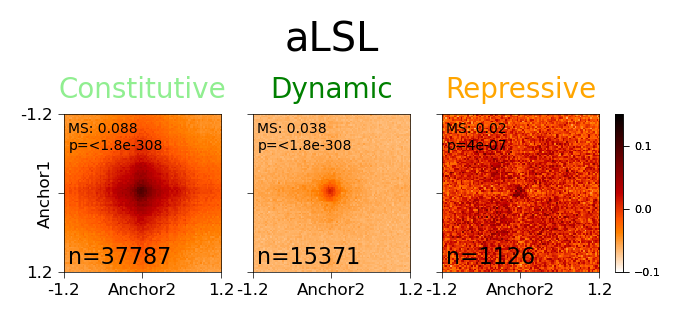

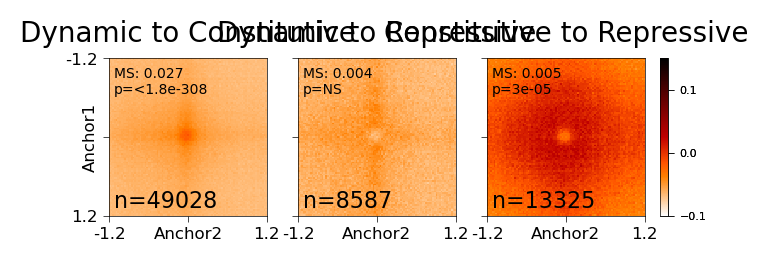

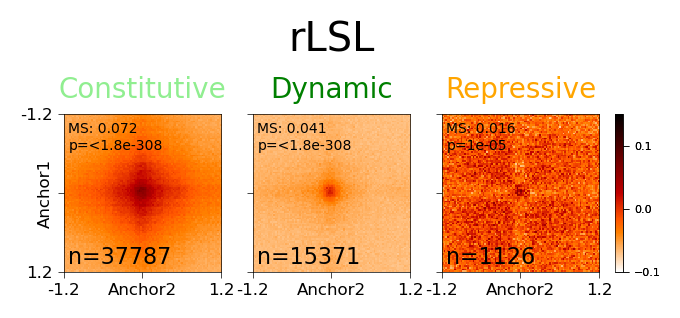

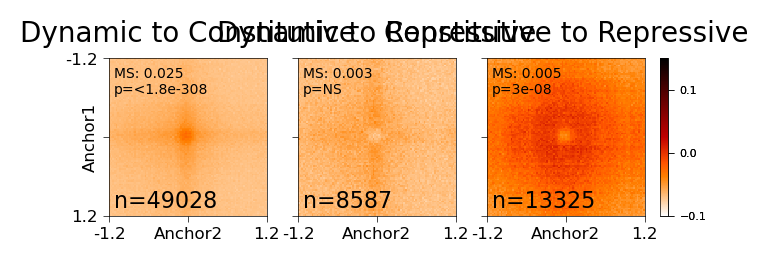

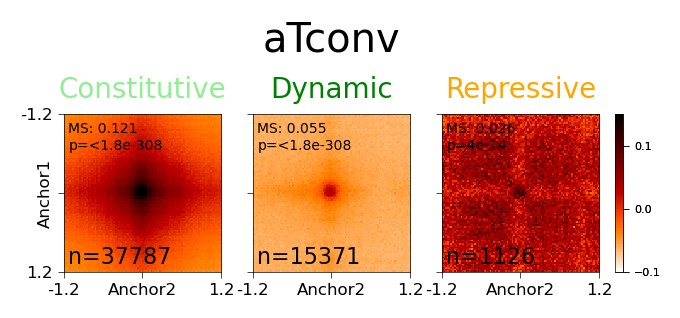

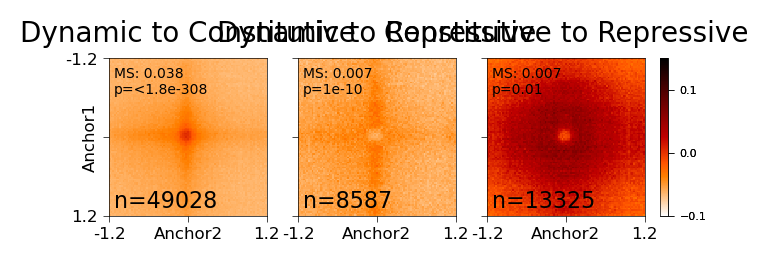

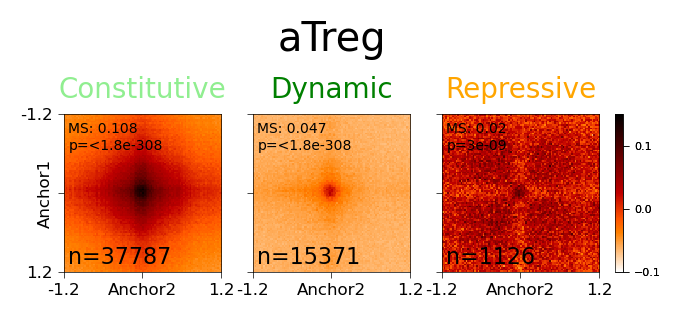

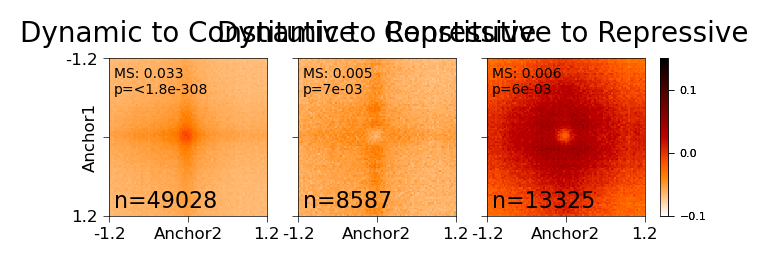

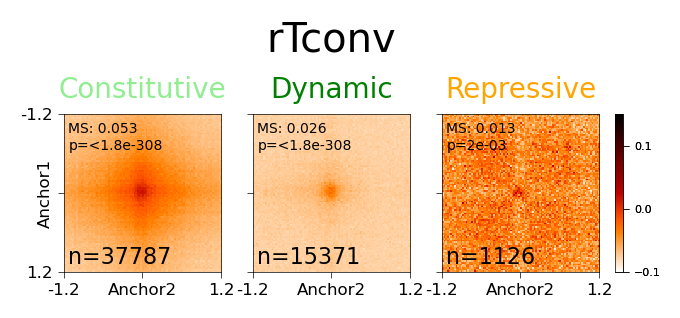

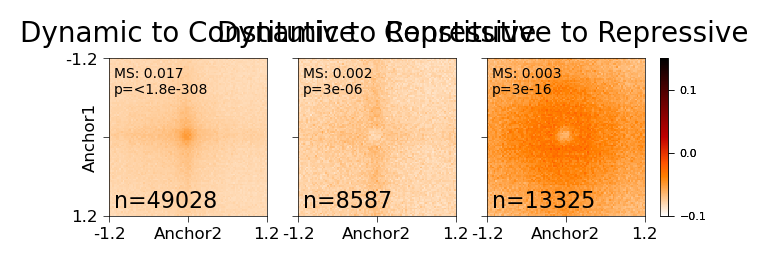

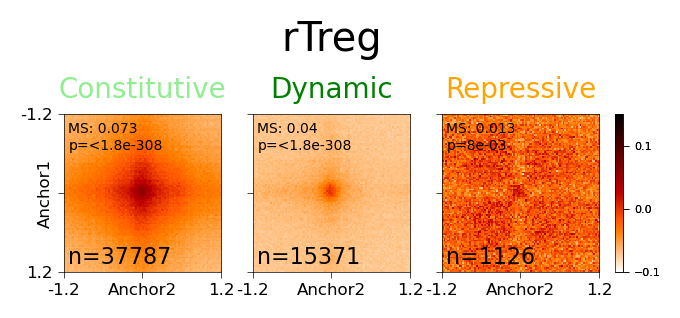

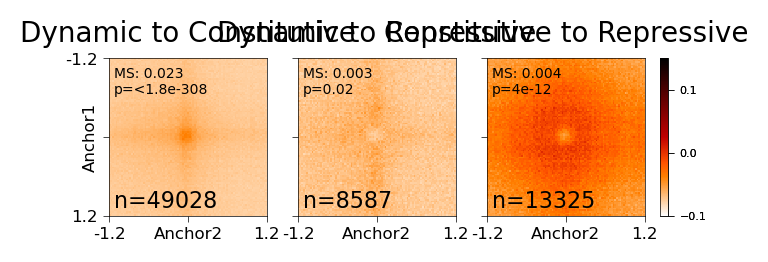

In [9]:
!mkdir -p plots/active_rest_pileup

newline = '\n'
all_results_dicts = {}
for key in inter_all_mat_dict:
    (fig_within_cluster, fig_between_cluster), results = plot_cluster_pileups_from_result(key, inter_all_mat_dict, inter_all_metadata,
                                     inter_all_metadata['cluster1'].unique(),
                                     res = 25_000,
                                     vmax = [.15, .15, .15, .15, .15, .15],
                                     vmin = [-.1, -.1, -.1, -.1, -.1, -.1],
                                     columns_to_names = columns_to_names,
                                     row_colors_dict = row_colors_dict,
                                     s1 = 5,
                                     center = 5, center_method='None',
                                    )    
    fig_within_cluster.suptitle(f"{key}", y=4, x=1.7, ha='center')
    fig_within_cluster.savefig(f'./plots/active_rest_pileup/{key}_all.pdf', bbox_inches='tight')
    all_results_dicts[key] = results

In [13]:
from plot_pvals import *

/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


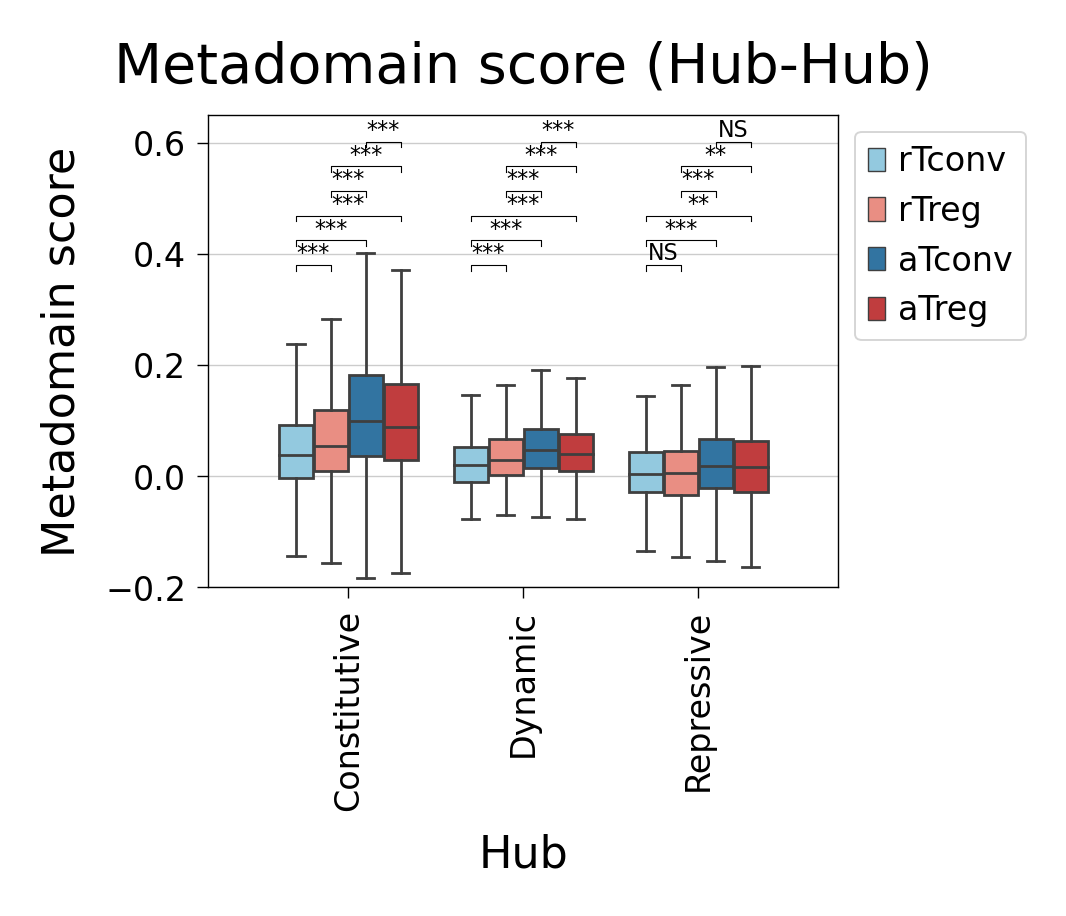

In [23]:
from itertools import combinations

all_datas = []
for u in [0, 4, 18]:
    idx = (inter_all_metadata['cluster1']==u) & (inter_all_metadata['cluster2']==u)
    data = pd.DataFrame()
    for key in inter_all_mat_dict:
        difference = all_results_dicts[key][u]['v_middle'] - all_results_dicts[key][u]['v_outside']
        data[key] = difference
    data['cluster'] = columns_to_names[u]
    all_datas.append(data)

data = pd.concat(all_datas, axis=0)
data = data.melt('cluster')

hue_order = ['rTconv', 'rTreg', 'aTconv', 'aTreg']
order = ['Constitutive', 'Dynamic', 'Repressive']
pairs = [((x, h1), (x, h2)) for x in order for h1, h2 in combinations(hue_order, 2)]

fig, axs = init_subplots_exact(1, 1, fgsz=(40*mm, 30*mm), dpi = 200)
sns.boxplot(data=data, x='cluster', y='value', hue='variable', fliersize=0,
           hue_order = hue_order,
           palette=['skyblue', 'salmon', 'tab:blue', 'tab:red'])
plt.ylim([-.2, .65])
plt.gca().set_axisbelow(True)
add_stat_annotation_boxplot_with_hue(
    plt.gca(), data, 'cluster', 'value', 'variable',
    order, hue_order, pairs, hue_start = -.3, hue_offset=.2, ymax=.35,
    delta=.12
)

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Hub")
plt.ylabel("Metadomain score")
plt.title("Metadomain score (Hub-Hub)")
fig.savefig('./plots/active_rest_pileup/quantification.pdf', bbox_inches = 'tight')

### Ikzf2 to hubs

/Genomics/pritykinlab/gabe/jupys/tregs/./code/hub_pileup.py:499: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([-cutoff, "Anchor1", cutoff])


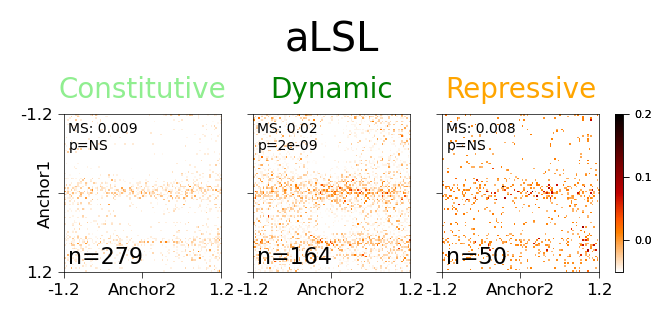

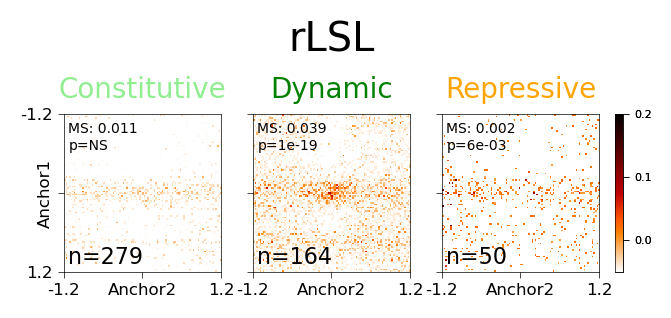

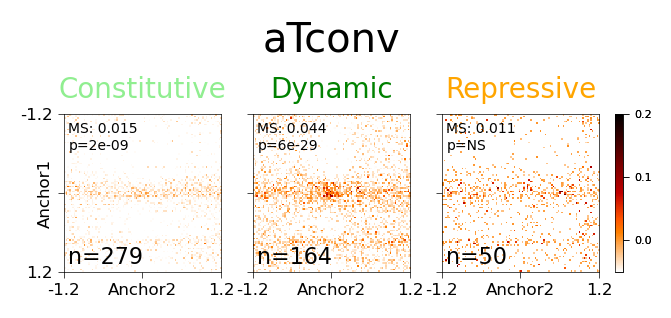

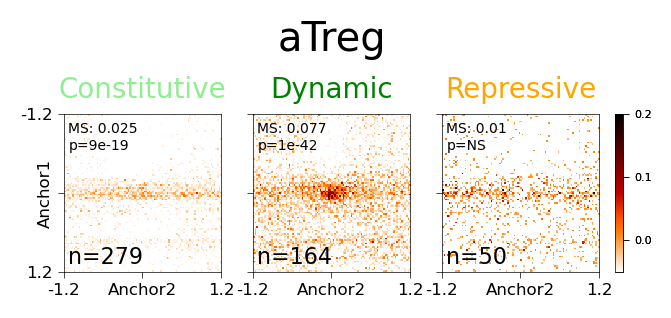

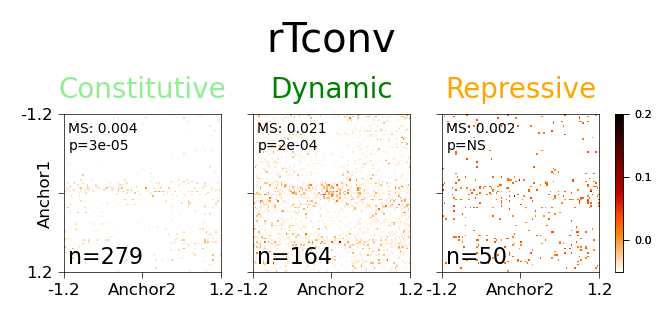

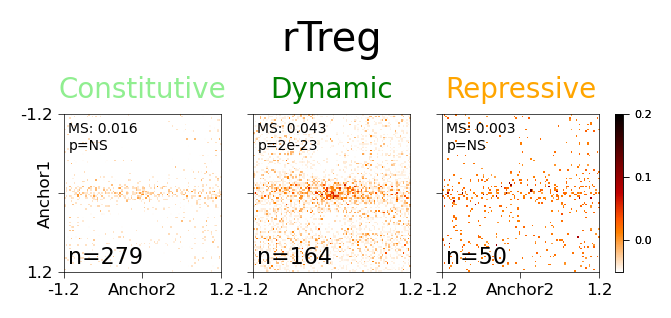

In [24]:
!mkdir -p plots/active_rest_pileup

newline = '\n'
all_results_dicts = {}
for key in inter_all_mat_dict:
    (fig_within_cluster), results = plot_ind_pileups_from_result(key, inter_all_mat_dict, inter_all_metadata,
                                     inter_all_metadata['cluster1'].unique(),
                                     278,
                                     res = 25_000,
                                     vmax = .2,
                                     vmin = -.05,
                                     columns_to_names = columns_to_names,
                                     row_colors_dict = row_colors_dict,
                                     s1 = 1,
                                     center = 5,
                                    )    
    fig_within_cluster = fig_within_cluster[0]
    fig_within_cluster.suptitle(f"{key}", y=4, x=1.7, ha='center')
    fig_within_cluster.savefig(f'./plots/active_rest_pileup/{key}_ikzf2.pdf', bbox_inches='tight')
    all_results_dicts[key] = results

/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


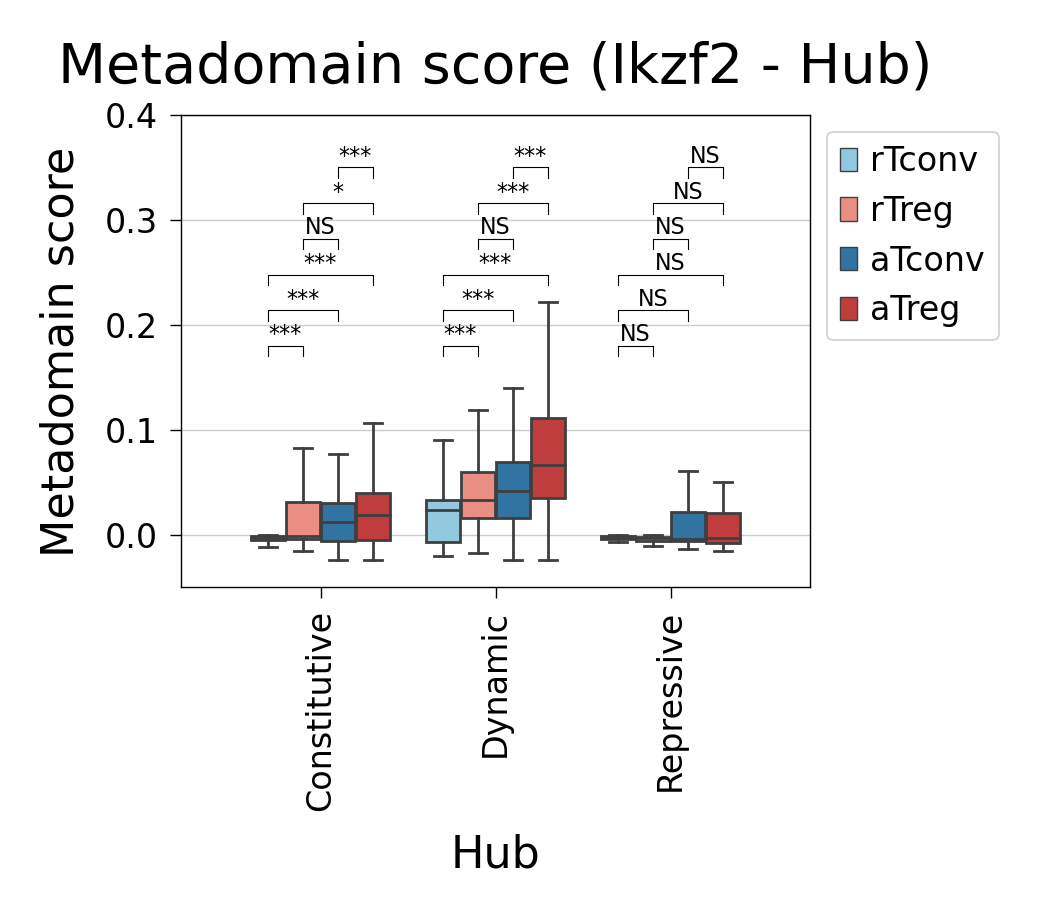

In [29]:
from itertools import combinations

all_datas = []
for u in [0, 4, 18]:
    idx = (inter_all_metadata['cluster1']==u) & (inter_all_metadata['cluster2']==u)
    data = pd.DataFrame()
    for key in inter_all_mat_dict:
        difference = all_results_dicts[key][u]['v_middle'] - all_results_dicts[key][u]['v_outside']
        data[key] = difference
    data['cluster'] = columns_to_names[u]
    all_datas.append(data)

data = pd.concat(all_datas, axis=0)
data = data.melt('cluster')

hue_order = ['rTconv', 'rTreg', 'aTconv', 'aTreg']
order = ['Constitutive', 'Dynamic', 'Repressive']
pairs = [((x, h1), (x, h2)) for x in order for h1, h2 in combinations(hue_order, 2)]

fig, axs = init_subplots_exact(1, 1, fgsz=(40*mm, 30*mm), dpi = 200)
sns.boxplot(data=data, x='cluster', y='value', hue='variable', fliersize=0,
           hue_order = hue_order,
           palette=['skyblue', 'salmon', 'tab:blue', 'tab:red'])
plt.ylim([-.05, .4])
plt.gca().set_axisbelow(True)
add_stat_annotation_boxplot_with_hue(
    plt.gca(), data, 'cluster', 'value', 'variable',
    order, hue_order, pairs, hue_start = -.3, hue_offset=.2, ymax=.15,
    delta = .2
)

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Hub")
plt.ylabel("Metadomain score")
plt.title("Metadomain score (Ikzf2 - Hub)")
fig.savefig('./plots/active_rest_pileup/ikzf2_quantification.pdf', bbox_inches = 'tight')

/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


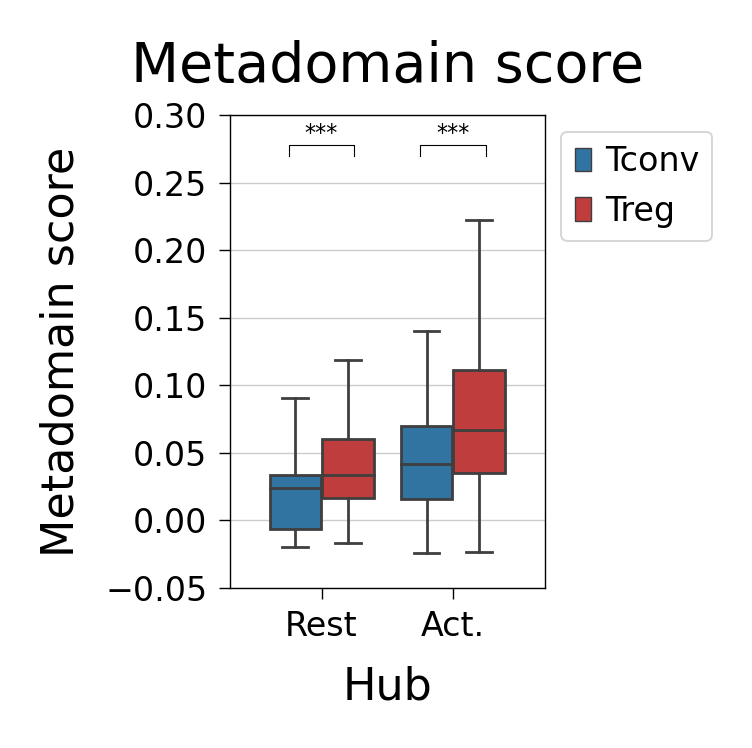

In [114]:
from plot_pvals import *
from itertools import combinations
from itertools import combinations

all_datas = []
for u in [4]:
    idx = (inter_all_metadata['cluster1']==u) & (inter_all_metadata['cluster2']==u)
    data = pd.DataFrame()
    for key in inter_all_mat_dict:
        difference = all_results_dicts[key][u]['v_middle'] - all_results_dicts[key][u]['v_outside']
        data[key] = difference
    data['cluster'] = columns_to_names[u]
    all_datas.append(data)

data = pd.concat(all_datas, axis=0)
data = data.melt('cluster')
data['celltype'] = [x[1:] for x in data['variable']]
data['status'] = ['Rest' if x[0] == 'r' else 'Act.' for x in data['variable']]
data = data[~(data['celltype']=='LSL')]

fig, axs = init_subplots_exact(1, 1, fgsz=(20*mm, 30*mm), dpi = 200)
sns.boxplot(data=data, x='status', y='value', hue='celltype', fliersize=0,
           hue_order = ['Tconv', 'Treg'],
           palette=['tab:blue', 'tab:red'],
           order = ['Rest', 'Act.'])
plt.ylim([-.05, .3])
plt.gca().set_axisbelow(True)

hue_order = ['Tconv', 'Treg']
order = ['Rest', 'Act.']
pairs = [((x, h1), (x, h2)) for x in order for h1, h2 in combinations(hue_order, 2)]

add_stat_annotation_boxplot_with_hue(plt.gca(), data, 'status', 'value', 'celltype', 
                                     order, hue_order, pairs, ymax=.25, delta = .01,
                                         yoff_method = 'add', hue_offset = .5,
                                     hue_start = -.25,
                                     h=.008
                                    )



plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Hub")
plt.ylabel("Metadomain score")
plt.title("Metadomain score")
fig.savefig('./plots/paper/fig5/ikzf2_quantification.pdf', bbox_inches = 'tight')